# Climate Model Warming Analysis

This notebook analyzes climate model data to understand the time difference between reaching 1.5°C and 2.0°C warming thresholds across different CMIP (Coupled Model Intercomparison Project) models.

## Overview
- Loads temperature data from CSV file
- Calculates temperature anomalies relative to 1850-1900 baseline
- Identifies when each model crosses 1.5°C and 2.0°C thresholds
- Visualizes the distribution of time differences between thresholds


In [ ]:
# Import required libraries
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [1]:
# Import required libraries
import csv
from collections import defaultdict
import matplotlib.pyplot as plt


## Data Loading
The following cell loads temperature data from the CSV file. The file is expected to have:
- First column: Years
- Subsequent columns: Temperature data for different climate models
- Header row with model names


In [2]:
# Load data from CSV file
with open('annual_global_averages.csv', newline='') as f:
    reader = csv.reader(f)
    header = next(reader)
    # first column is year
    years = []
    data = defaultdict(list)
    for row in reader:
        year = int(row[0])
        years.append(year)
        for col_name, value in zip(header[1:], row[1:]):
            if value:
                data[col_name].append(float(value))
            else:
                data[col_name].append(float('nan'))


## Baseline Calculation
Calculate the baseline temperature for each model using the 1850-1900 period, following IPCC guidelines. This baseline will be used to compute temperature anomalies.


In [3]:
# Calculate baseline averages for 1850-1900 period
baseline_indices = [i for i, y in enumerate(years) if 1850 <= y <= 1900]
baseline_avgs = {}
for model, temps in data.items():
    subset = [temps[i] for i in baseline_indices if i < len(temps)]
    baseline_avgs[model] = sum(subset) / len(subset)


## Threshold Analysis
For each model:
1. Calculate temperature anomalies relative to the baseline
2. Find the year when warming first exceeds 1.5°C
3. Find the year when warming first exceeds 2.0°C
4. Calculate the time difference between these thresholds


In [4]:
# Compute time differences between 1.5°C and 2.0°C thresholds
diffs = []
for model, temps in data.items():
    baseline = baseline_avgs[model]
    anomalies = [t - baseline for t in temps]
    year_15 = None
    year_20 = None
    for yr, val in zip(years, anomalies):
        if year_15 is None and val >= 1.5:
            year_15 = yr
        if year_20 is None and val >= 2.0:
            year_20 = yr
        if year_15 is not None and year_20 is not None:
            break
    if year_15 is not None and year_20 is not None:
        diffs.append(year_20 - year_15)


## Visualization
Create a histogram showing the distribution of time differences between reaching the 1.5°C and 2.0°C warming thresholds across all models. This visualization helps understand the expected pace of warming in the critical range between these two important temperature thresholds.


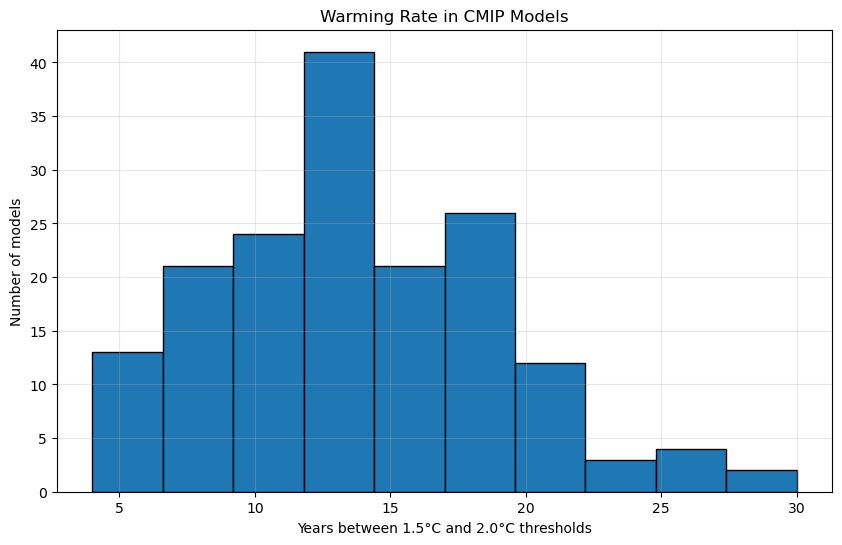

In [5]:
# Create histogram of time differences
if diffs:
    plt.figure(figsize=(10, 6))
    plt.hist(diffs, bins=10, edgecolor='black')
    plt.xlabel('Years between 1.5°C and 2.0°C thresholds')
    plt.ylabel('Number of models')
    plt.title('Warming Rate in CMIP Models')
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print('No models reach both thresholds')


## Detailed Analysis of Fastest and Slowest Warming Models
Let's identify and visualize the models that show the shortest and longest time periods between reaching 1.5°C and 2.0°C warming thresholds. This will help us understand the range of warming trajectories in the model ensemble.


In [6]:
# Find models with shortest and longest periods between thresholds
model_periods = []
model_anomalies = {}

for model, temps in data.items():
    baseline = baseline_avgs[model]
    anomalies = [t - baseline for t in temps]
    model_anomalies[model] = anomalies
    
    year_15 = None
    year_20 = None
    
    for yr, val in zip(years, anomalies):
        if year_15 is None and val >= 1.5:
            year_15 = yr
        if year_20 is None and val >= 2.0:
            year_20 = yr
        if year_15 is not None and year_20 is not None:
            break
            
    if year_15 is not None and year_20 is not None:
        period = year_20 - year_15
        model_periods.append((model, period, year_15, year_20))

if model_periods:
    # Sort by period length
    model_periods.sort(key=lambda x: x[1])
    
    # Get fastest and slowest models
    fastest_model, fastest_period, fast_y15, fast_y20 = model_periods[0]
    slowest_model, slowest_period, slow_y15, slow_y20 = model_periods[-1]
    
    print(f"Fastest warming model: {fastest_model}")
    print(f"Time between 1.5°C and 2.0°C: {fastest_period} years")
    print(f"Years reached: {fast_y15} and {fast_y20}")
    print("\n")
    print(f"Slowest warming model: {slowest_model}")
    print(f"Time between 1.5°C and 2.0°C: {slowest_period} years")
    print(f"Years reached: {slow_y15} and {slow_y20}")
else:
    print("No models reach both thresholds")


Fastest warming model: CCCma.CanESM5.gn_r11i1p2f1
Time between 1.5°C and 2.0°C: 4 years
Years reached: 2002 and 2006


Slowest warming model: CMCC.CMCC-ESM2.gn_r1i1p1f1
Time between 1.5°C and 2.0°C: 30 years
Years reached: 2001 and 2031


In [ ]:
# Calculate time differences between 1.5°C and 3.0°C thresholds
threshold_times = {}

for model, temps in data.items():
    baseline = baseline_avgs[model]
    anomalies = [t - baseline for t in temps]
    
    year_15 = None
    year_30 = None
    
    for yr, val in zip(years, anomalies):
        if year_15 is None and val >= 1.5:
            year_15 = yr
        if year_30 is None and val >= 3.0:
            year_30 = yr
            break
            
    if year_15 is not None and year_30 is not None:
        threshold_times[model] = year_30 - year_15
    else:
        threshold_times[model] = np.nan  # Use NaN for models that don't reach both thresholds

# Create pandas Series
warming_periods = pd.Series(threshold_times)
warming_periods.index.name = 'Model Run'
warming_periods.name = 'Years between 1.5°C and 3.0°C'

# Display the Series sorted by warming period
print("Time periods between 1.5°C and 3.0°C warming thresholds:")
print("\nSorted by warming period (ascending):")
print(warming_periods.sort_values().dropna())
print("\nModels that don't reach both thresholds:")
print(warming_periods[warming_periods.isna()].index.tolist())


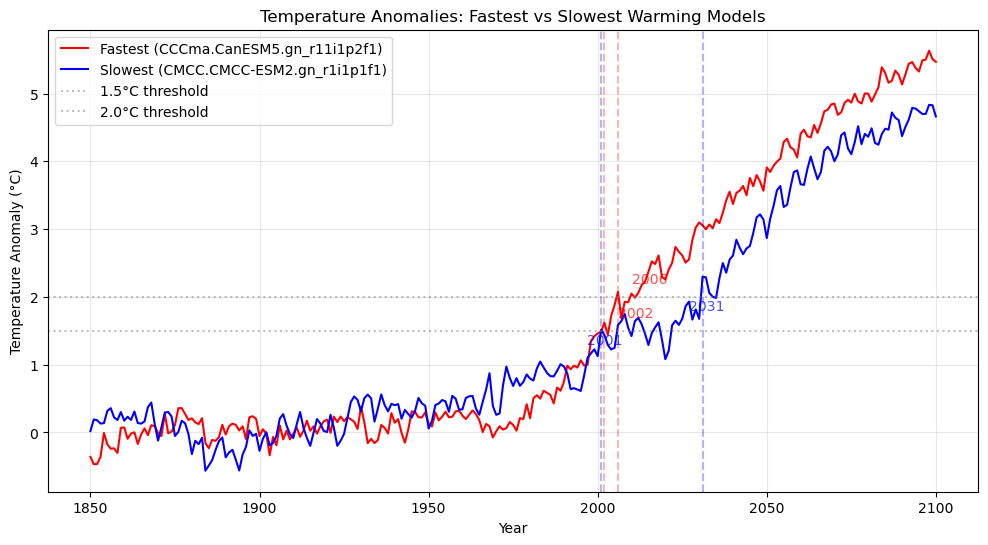

In [9]:
if model_periods:
    plt.figure(figsize=(12, 6))
    
    # Plot fastest model
    plt.plot(years, model_anomalies[fastest_model], 'r-', label=f'Fastest ({fastest_model})')
    plt.axvline(x=fast_y15, color='r', linestyle='--', alpha=0.3)
    plt.axvline(x=fast_y20, color='r', linestyle='--', alpha=0.3)
    
    # Plot slowest model
    plt.plot(years, model_anomalies[slowest_model], 'b-', label=f'Slowest ({slowest_model})')
    plt.axvline(x=slow_y15, color='b', linestyle='--', alpha=0.3)
    plt.axvline(x=slow_y20, color='b', linestyle='--', alpha=0.3)
    
    # Add threshold lines
    plt.axhline(y=1.5, color='gray', linestyle=':', alpha=0.5, label='1.5°C threshold')
    plt.axhline(y=2.0, color='gray', linestyle=':', alpha=0.5, label='2.0°C threshold')
    
    plt.xlabel('Year')
    plt.ylabel('Temperature Anomaly (°C)')
    plt.title('Temperature Anomalies: Fastest vs Slowest Warming Models')
    plt.grid(True, alpha=0.3)
    #plt.xlim(1970,2060)
    plt.legend()
    
    # Add annotations for crossing points
    plt.annotate(f'{fast_y15}', (fast_y15, 1.5), xytext=(10, 10), 
                textcoords='offset points', color='r', alpha=0.7)
    plt.annotate(f'{fast_y20}', (fast_y20, 2.0), xytext=(10, 10), 
                textcoords='offset points', color='r', alpha=0.7)
    plt.annotate(f'{slow_y15}', (slow_y15, 1.5), xytext=(-10, -10), 
                textcoords='offset points', color='b', alpha=0.7)
    plt.annotate(f'{slow_y20}', (slow_y20, 2.0), xytext=(-10, -10), 
                textcoords='offset points', color='b', alpha=0.7)
    
    plt.show()
else:
    print("No models to plot")
